# Preprocessed Citibike Data: Exploratory Data Analysis

## Import libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.axes as axes

## Import and load data

Import preprocessed data:

In [5]:
cb_raw = pd.read_csv('citibike_final.csv', parse_dates=['starttime', 'stoptime'])

Make a copy: 

In [6]:
cb = cb_raw.copy()

## Inspect data frame

Get dimensions of data frame and datatypes of each feature:

In [7]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 15 columns):
bikeid                   int64
birthyear                int64
endstationid             int64
endstationlatitude       float64
endstationlongitude      float64
endstationname           object
gender                   int64
startstationid           int64
startstationlatitude     float64
startstationlongitude    float64
startstationname         object
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int64
usertype                 object
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 459.5+ MB


Randomly sample five observations:

In [5]:
cb.head()

,bikeid,birthyear,endstationid,endstationlatitude,endstationlongitude,endstationname,gender,startstationid,startstationlatitude,startstationlongitude,startstationname,starttime,stoptime,tripduration,usertype
0,16852,1991.0,252.0,40.732264,-73.998522,MacDougal St & Washington Sq,1,312.0,40.722055,-73.989111,Allen St & Stanton St,2017-09-01 00:04:15,2017-09-01 00:11:18,422.0,Subscriber
1,27730,1983.0,468.0,40.765265,-73.981923,Broadway & W 56 St,1,478.0,40.760301,-73.998842,11 Ave & W 41 St,2017-09-01 00:06:19,2017-09-01 00:17:09,650.0,Subscriber
2,28032,1989.0,395.0,40.688070,-73.984106,Bond St & Schermerhorn St,1,237.0,40.730473,-73.986724,E 11 St & 2 Ave,2017-09-01 00:07:34,2017-09-01 00:29:49,1334.0,Subscriber
3,15651,1989.0,3449.0,40.721463,-73.948009,Eckford St & Engert Ave,2,3090.0,40.717746,-73.956001,N 8 St & Driggs Ave,2017-09-01 00:10:49,2017-09-01 00:13:52,182.0,Subscriber
4,17018,1900.0,402.0,40.740343,-73.989551,Broadway & E 22 St,0,325.0,40.736245,-73.984738,E 19 St & 3 Ave,2017-09-01 00:11:00,2017-09-01 00:15:39,278.0,Customer


## Data preprocessing

Show unique values per feature:

In [ ]:
pd.DataFrame.from_records([(col, cb[col].nunique()) for col in cb.columns],
                          columns=['Feature', 'Number of Unique Values']).sort_values(by=['Number of Unique Values'])

### Define features

Define numerical features:

In [8]:
cb.birthyear = cb.birthyear.astype('float16').astype('int16')

Define categorical features:

In [9]:
datetime_feat = ['birthyear','starttime', 'stoptime']
cont_feat = datetime_feat + ['tripduration']

In [10]:
num_nom_feat = ['bikeid','endstationid','startstationid','gender']
cat_nom_feat = ['endstationname','startstationname','usertype']
nom_feat = num_nom_feat + cat_nom_feat

### Perform datatype conversions

Convert unique ID numbers and trip durations to `int64`:

In [11]:
float_to_int = ['startstationid','endstationid','tripduration', 'bikeid', 'gender']

#change to int16 to reduce memory
cb[float_to_int] = cb[float_to_int].apply(lambda x: x.astype('int16'))

Convert untreated nominal features to categorical datatype:

In [12]:
#and for nominal features
cb[cat_nom_feat] = cb[cat_nom_feat].apply(lambda x: x.astype('category'))

Check for successful datatype conversion and reduction in memory:

In [80]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 15 columns):
bikeid                   int16
birthyear                int64
endstationid             int16
endstationlatitude       float64
endstationlongitude      float64
endstationname           category
gender                   int16
startstationid           int16
startstationlatitude     float64
startstationlongitude    float64
startstationname         category
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int16
usertype                 category
dtypes: category(3), datetime64[ns](2), float64(4), int16(5), int64(1)
memory usage: 272.0 MB


## Feature engineering

In [194]:
def extract_part_of_day(hour):
    if hour < 6 and hour>=0:
        return 'early morning'
    if hour < 9 and hour>=6:
        return 'morning'
    if hour < 12 and hour>=9:
        return 'late morning'
    if hour < 15 and hour>=12:
        return 'afternoon'
    if hour < 18 and hour>=15:
        return 'late afternoon/early evening'
    return 'evening'

In [14]:
def extract_decade(age):
    if age <10 and age>=0:
        return 'pre-tens'
    if age <20 and age>=10:
        return 'tens'
    if age <30 and age>=20:
        return 'twenties'
    if age <40 and age>=30:
        return 'thirties'
    if age <50 and age>=40:
        return 'forties'
    if age <60 and age>=50:
        return 'fifties'
    if age <70 and age>=60:
        return 'sixties'
    if age <80 and age>=70:
        return 'seventies'
    if age <90 and age>=80:
        return 'eighties'
    if age <100 and age>=90:
        return 'nineties'
    return 'deceased centenials'

In [15]:
cb['year'] = cb['starttime'].dt.year
cb['day'] = cb['starttime'].dt.dayofweek
cb['hour'] = cb['starttime'].dt.hour
cb['age'] = cb['year'] - cb['birthyear']
cb['dayofyear'] = cb['starttime'].dt.dayofyear

In [16]:
cb['part_of_day'] = cb['starttime'].apply(lambda t: extract_part_of_day(t.hour))

In [17]:
cb['decade'] = cb['age'].apply(lambda t: extract_decade(t))

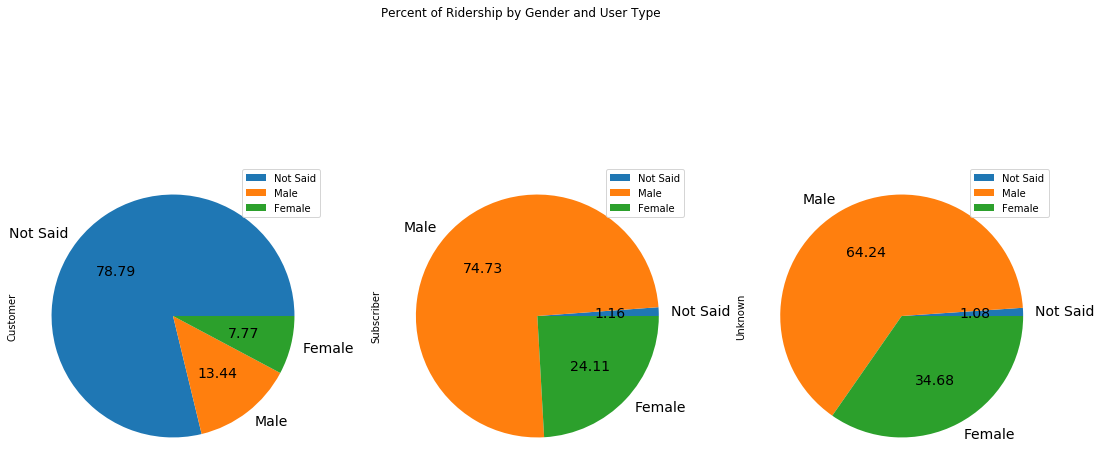

In [256]:
#percent ridership by gender and usertype

cb.groupby(['gender','usertype'])['bikeid'].count().unstack().plot(kind='pie', subplots=True, labels=['Not Said', 'Male', 'Female'], figsize=(18.5, 9),  fontsize=14, autopct='%.2f', title='Percent of Ridership by Gender and User Type')
plt.savefig('Gend_Percent_Rides.jpg')

In [286]:
#remove years that only have partial data
temp = cb[cb.year!=2020]
temp = temp[temp.year!=2013]

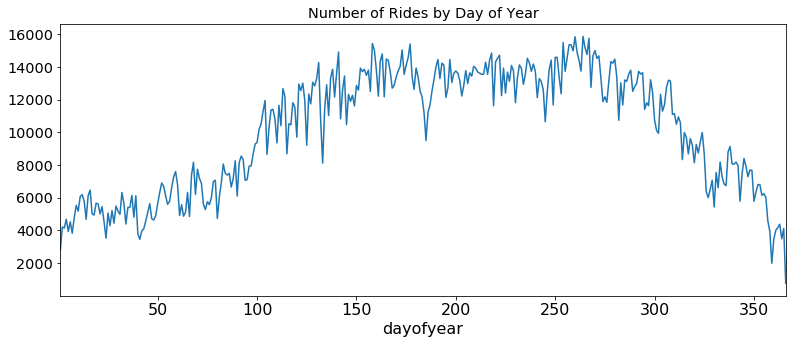

In [327]:
#number of rides by part of day

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(13,5))
#cb.groupby('part_of_day')['bikeid'].count().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening']).plot(ax=ax3, title='Number of Rides by Part of Day')
#cb.groupby('day')['bikeid'].count().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}).plot(ax=ax2, title='Number of Rides by Day')
temp.groupby(['dayofyear'])['bikeid'].count().plot(title = 'Number of Rides by Day of Year')
#plt.subplots_adjust(hspace = 0.4)
plt.savefig('Coarse_Rides.jpg')

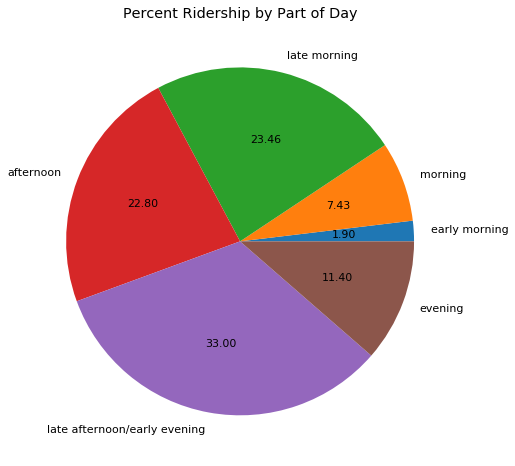

In [325]:
#Percent Rides by Part of Day
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
cb.groupby('part_of_day')['bikeid'].count().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening']).plot(kind='pie', fontsize=11, autopct='%.2f', figsize=(12,8), title='Percent Ridership by Part of Day')
plt.ylabel('')
plt.savefig('PerRide_Day.jpg')

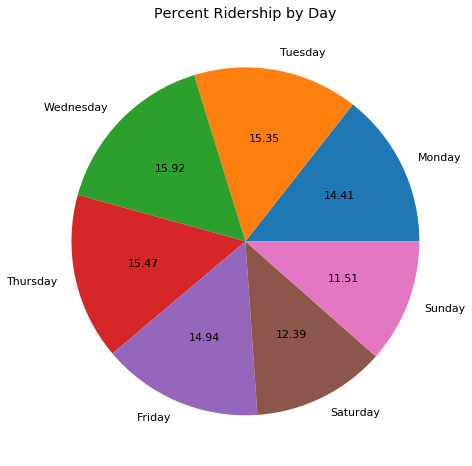

In [326]:
#Percent Rides by Part of Day
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
cb.groupby('day')['bikeid'].count().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}).plot(kind='pie', fontsize=11, autopct='%.2f', title='Percent Ridership by Day', figsize=(12,8))
plt.ylabel('')
plt.savefig('PerRide_Part.jpg')

In [261]:
#used for cell below
dat = cb.groupby(['day','part_of_day']).count()['bikeid'].unstack().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}).stack().swaplevel(i='day', j='part_of_day').unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening']).stack().swaplevel(i='part_of_day', j='day').unstack()/len(cb.bikeid)

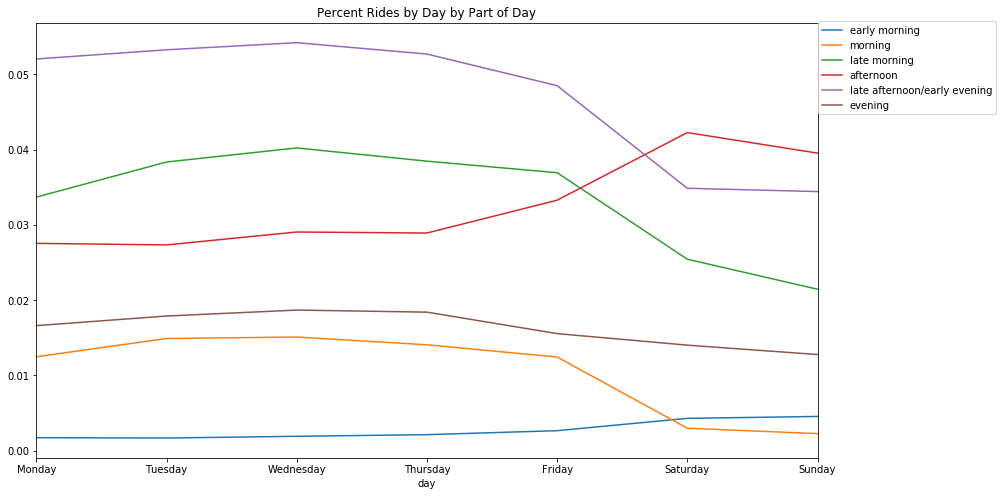

In [267]:
#number of rides by part of day by day

fig, ax = plt.subplots(figsize=(14,8))
dat.plot(ax=ax, title='Percent Rides by Day by Part of Day')
ax.legend(loc=[1,0.79])

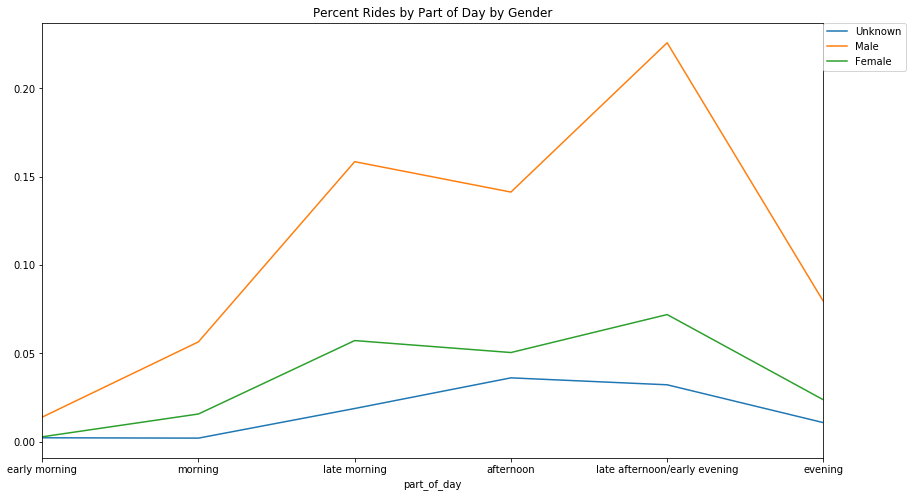

In [269]:
#percent rides by part of day of gender
fig, ax = plt.subplots(figsize=(14,8))
(cb.groupby(['gender', 'part_of_day']).count()['bikeid'].unstack().rename(index={0:"Unknown", 1:"Male", 2:"Female"}).stack().swaplevel(i='gender', j='part_of_day').unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])/len(cb.bikeid)).plot(ax=ax, title='Percent Rides by Part of Day by Gender')
ax.legend(loc=[1,0.89])

In [212]:
#for use in below cells
start = cb.groupby(['startstationname'])['bikeid'].count()
stop = cb.groupby(['endstationname'])['bikeid'].count()
y = (stop-start).sort_values(ascending=False).values
x = (stop-start).sort_values(ascending=False).index

In [216]:
(stop-start).sort_values(ascending=False)

DeKalb Ave & Hudson Ave       2408.0
West St & Chambers St         1461.0
Broadway & Battery Pl         1436.0
W 33 St & 7 Ave               1385.0
E 17 St & Broadway            1263.0
                               ...  
Paulus Hook                      NaN
SSP Tech Workshop                NaN
Somers St & Broadway             NaN
Stanhope St & Fairview Ave       NaN
Van Vorst Park                   NaN
Name: bikeid, Length: 1105, dtype: float64

In [239]:
(stop-start).loc[:, 'W 33 St & 7 Ave']

part_of_day
early morning                   -112.0
morning                        -2159.0
late morning                    -162.0
afternoon                       2409.0
late afternoon/early evening    2096.0
evening                         -687.0
Name: W 33 St & 7 Ave, dtype: float64

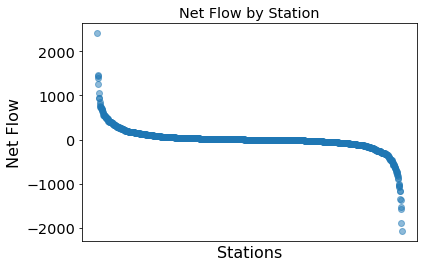

In [318]:
#New Flow by Station

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Net Flow')
plt.title('Net Flow by Station')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig('Net_Rides.jpg')

In [271]:
#groupby objects for following cell
start = cb.groupby(['part_of_day','startstationname'])['bikeid'].count().unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
stop = cb.groupby(['part_of_day','endstationname'])['bikeid'].count().unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
grouped = (stop-start).stack().groupby('part_of_day')

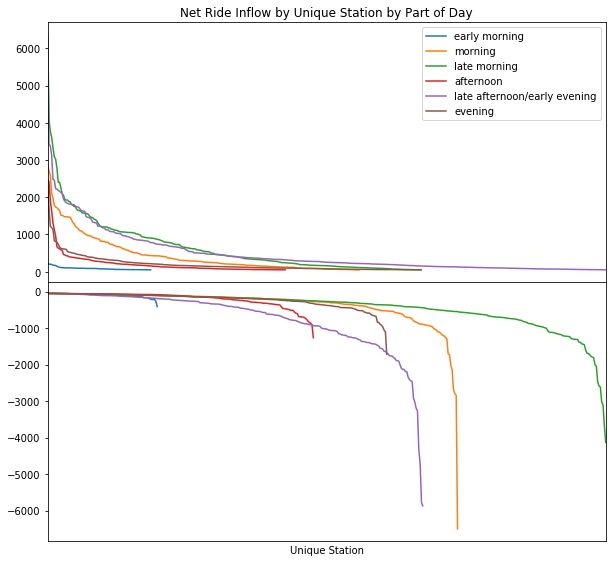

In [272]:
#Net Ride Inflow by Station by Part of Day
fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

for name, group in grouped:
    line1 = group.sort_values(ascending=False)[group>50].plot(ax=ax1, title='Net Ride Inflow by Unique Station by Part of Day')
    line2 = group.sort_values(ascending=False)[group<-50].plot(ax=ax2)

plt.xlabel('Unique Station')
ax1.legend(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.subplots_adjust(bottom=0, right=0.9, top=0.9, hspace = 0)
plt.savefig('Net_Infow_Compound.jpg')

In [152]:
#print statements for examining outflowing stations

for name, group in grouped:
    print('Ten Most Positive Net Inflow Stations during', name)
    print('-'*55)
    print(tuple(zip(group.sort_values(ascending=False).values[:10], group.sort_values(ascending=False).index.get_level_values(1)[:10])))
    print('-'*100)

Most Positive Net Inflow Stations during early morning
-------------------------------------------------------
((233.0, 'E 25 St & 2 Ave'), (206.0, 'E 10 St & Avenue A'), (198.0, 'E 20 St & FDR Drive'), (197.0, 'E 25 St & 1 Ave'), (177.0, 'E 39 St & 2 Ave'), (170.0, 'E 14 St & Avenue B'), (168.0, 'W 37 St & 10 Ave'), (147.0, 'E 2 St & Avenue C'), (130.0, 'West Thames St'), (119.0, 'Bialystoker Pl & Delancey St'))
----------------------------------------------------------------------------------------------------
Most Positive Net Inflow Stations during morning
-------------------------------------------------------
((2886.0, 'E 47 St & Park Ave'), (2703.0, 'W 52 St & 5 Ave'), (2581.0, 'E 24 St & Park Ave S'), (2097.0, 'Broadway & W 49 St'), (1981.0, 'E 53 St & Madison Ave'), (1786.0, 'E 51 St & Lexington Ave'), (1736.0, 'Grand Army Plaza & Central Park S'), (1723.0, 'E 27 St & 1 Ave'), (1677.0, 'W 44 St & 5 Ave'), (1647.0, 'Murray St & West St'))
---------------------------------------

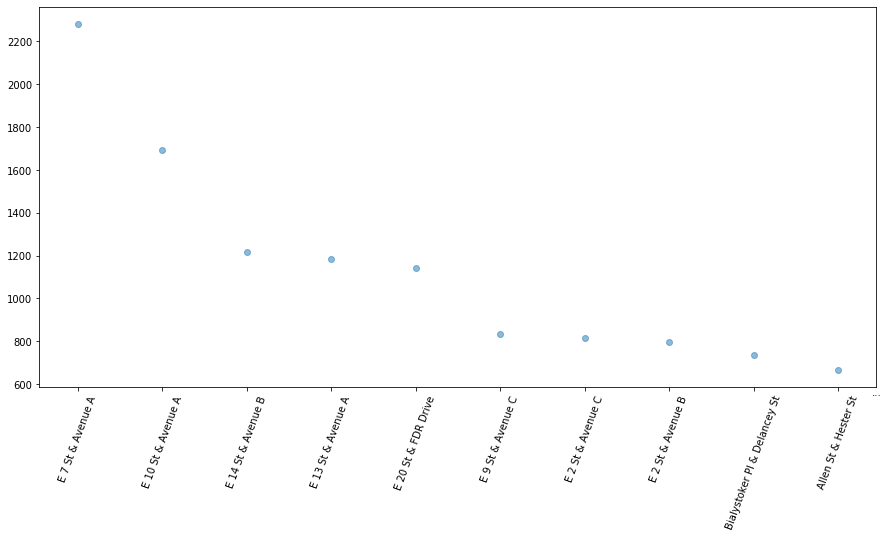

In [186]:
#Net Outflow for most outflowing docks
fig, ax = plt.subplots(figsize=(15,7))

y = abs(group.sort_values(ascending=False).values[:10])
x = group.sort_values(ascending=False).index.get_level_values(1)[:10]

plt.scatter(x, y, alpha=0.5)
plt.xticks(rotation=70)
plt.xlabel("...", labelpad=-70)
ax.xaxis.set_label_coords(1, 0)

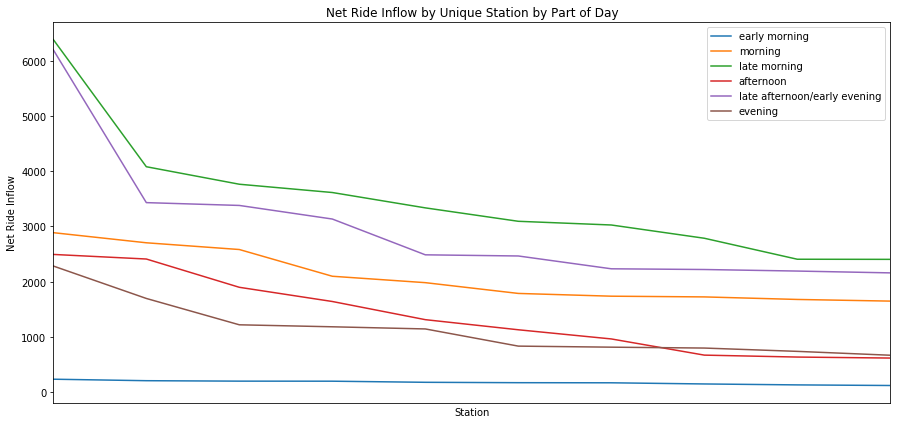

In [279]:
#net inflow by station by part of day
fig, ax = plt.subplots(figsize=(15,7))

for name, group in grouped:
    group.sort_values(ascending=False)[:10].plot(ax=ax, title='Net Inflow by Station by Part of Day')

ax.legend(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Station')
plt.ylabel('Net Ride Inflow')
plt.savefig('Net_Inflow.jpg')

In [154]:
#print statements for examining outflowing stations
for name, group in grouped:
    print('Ten Most Positive Net Outflow Stations during', name)
    print('-'*55)
    print(tuple(zip(abs(group.sort_values(ascending=True).values[:10]), group.sort_values(ascending=True).index.get_level_values(1)[:10])))
    print('-'*100)

Ten Most Positive Net Outflow Stations during early morning
-------------------------------------------------------
((411.0, 'W 4 St & 7 Ave S'), (264.0, 'Washington Pl & 6 Ave'), (219.0, 'Lafayette St & E 8 St'), (218.0, 'LaGuardia Pl & W 3 St'), (215.0, 'Carmine St & 6 Ave'), (213.0, 'Washington St & Gansevoort St'), (182.0, 'Metropolitan Ave & Bedford Ave'), (175.0, 'Allen St & Stanton St'), (171.0, 'Sullivan St & Washington Sq'), (171.0, 'W 13 St & Hudson St'))
----------------------------------------------------------------------------------------------------
Ten Most Positive Net Outflow Stations during morning
-------------------------------------------------------
((6504.0, '8 Ave & W 31 St'), (2844.0, 'W 42 St & Dyer Ave'), (2799.0, 'W 41 St & 8 Ave'), (2693.0, 'W 42 St & 8 Ave'), (2159.0, 'W 33 St & 7 Ave'), (2016.0, '8 Ave & W 33 St'), (1730.0, 'E 20 St & FDR Drive'), (1711.0, 'Penn Station Valet'), (1300.0, 'E 13 St & Avenue A'), (1259.0, 'W 43 St & 10 Ave'))
--------------

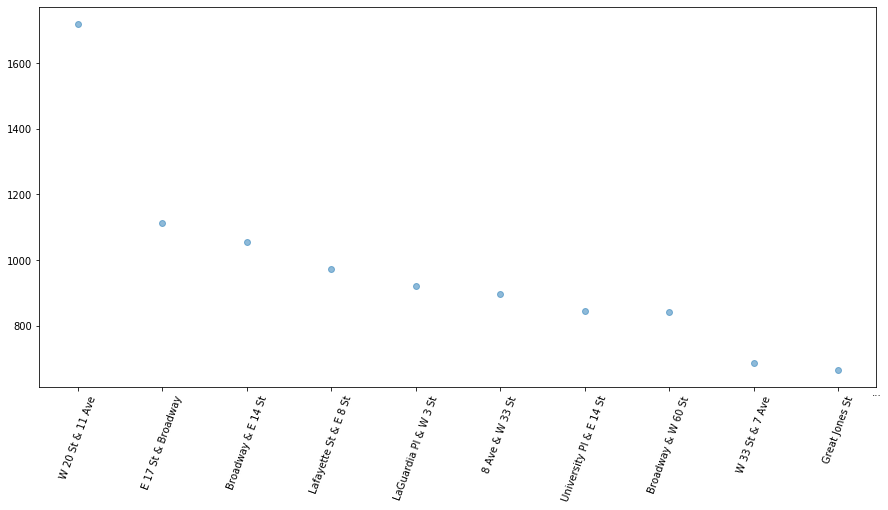

In [181]:
#Net Outflow for most outflowing docks

fig, ax = plt.subplots(figsize=(15,7))

y = abs(group.sort_values(ascending=True).values[:10])
x = group.sort_values(ascending=True).index.get_level_values(1)[:10]

plt.scatter(x, y, alpha=0.5)
plt.xticks(rotation=70)
plt.xlabel("...", labelpad=-70)
ax.xaxis.set_label_coords(1, 0)

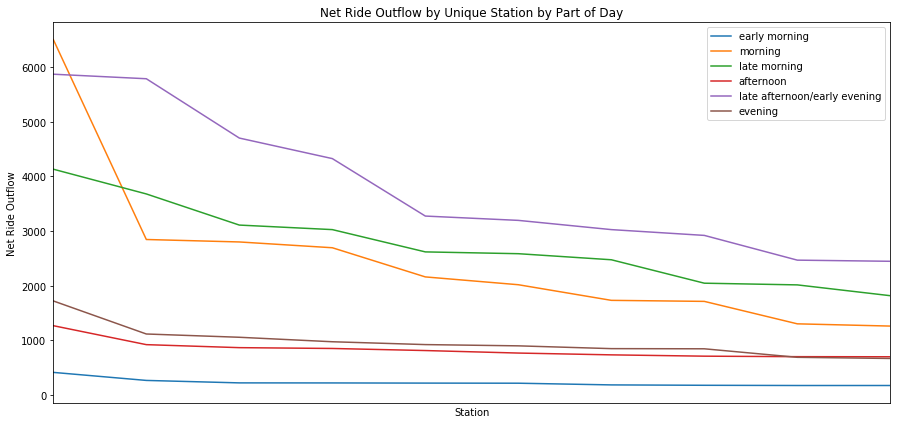

In [280]:
#Net Outflow by Station by Part of Day
fig, ax = plt.subplots(figsize=(15,7))

for name, group in grouped:
    abs(group.sort_values(ascending=True)[:10]).plot(ax=ax, title='Net Outflow by Station by Part of Day')

ax.legend(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.xlabel('Station')
plt.ylabel('Net Ride Outflow')
plt.savefig('Net_Outflow.jpg')

In [246]:
#for use in following cell
start = cb.groupby(['day','startstationname'])['bikeid'].count().unstack().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
stop = cb.groupby(['day','endstationname'])['bikeid'].count().unstack().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
grouped = (stop-start).stack().groupby('day')

,1 Ave & E 110 St,1 Ave & E 15 St,1 Ave & E 16 St,1 Ave & E 18 St,1 Ave & E 30 St,1 Ave & E 44 St,1 Ave & E 5 St,1 Ave & E 62 St,1 Ave & E 68 St,1 Ave & E 78 St,...,Woodward Ave & Harman St,Wyckoff Av & Jefferson St,Wyckoff Av & Stanhope St,Wyckoff St & 3 Ave,Wyckoff St & Bond St,Wyckoff St & Nevins St,Wythe Ave & Metropolitan Ave,Yankee Ferry Terminal,York St & Jay St,old - E 13 St & Avenue A
day,,,,,,,,,,,,,,,,,,,,,
Monday,4.0,99.0,154.0,54.0,-88.0,1.0,2.0,-46.0,-87.0,164.0,...,NaN,-2.0,NaN,-5.0,12.0,1.0,80.0,-2.0,-4.0,1.0
Tuesday,17.0,-62.0,-4.0,3.0,-22.0,28.0,-7.0,29.0,-59.0,-11.0,...,0.0,7.0,0.0,2.0,3.0,0.0,-20.0,6.0,48.0,-1.0
Wednesday,10.0,25.0,3.0,-18.0,114.0,-26.0,2.0,-64.0,-38.0,39.0,...,NaN,6.0,0.0,14.0,4.0,NaN,23.0,-5.0,50.0,9.0
Thursday,-35.0,21.0,51.0,-52.0,11.0,27.0,-12.0,-87.0,-9.0,34.0,...,NaN,8.0,-2.0,-24.0,-3.0,0.0,34.0,8.0,-13.0,1.0
Friday,-13.0,-48.0,-31.0,2.0,90.0,123.0,3.0,-2.0,-9.0,6.0,...,NaN,16.0,-6.0,35.0,2.0,1.0,112.0,-27.0,13.0,6.0
Saturday,10.0,-144.0,-132.0,-256.0,88.0,33.0,-4.0,-3.0,-21.0,-135.0,...,NaN,-4.0,0.0,-14.0,-9.0,NaN,81.0,-30.0,35.0,0.0
Sunday,6.0,-47.0,21.0,93.0,84.0,13.0,-5.0,44.0,-28.0,11.0,...,NaN,-12.0,-1.0,-3.0,-4.0,1.0,12.0,-24.0,47.0,4.0


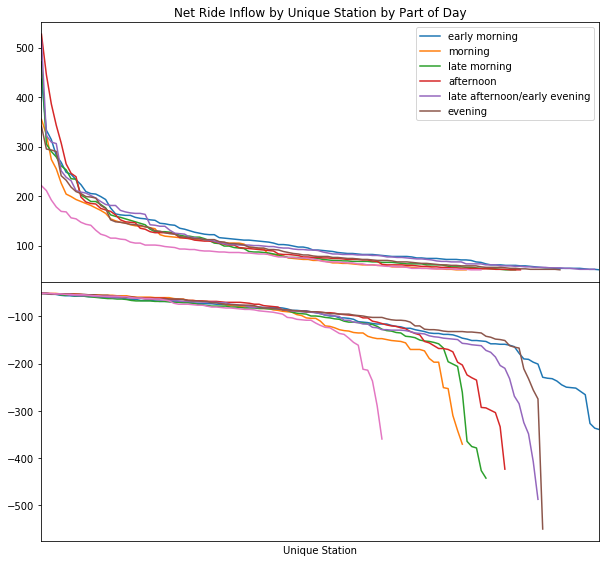

In [247]:
#Net Ride Inflow by Station by Part of Day
fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

for name, group in grouped:
    line1 = group.sort_values(ascending=False)[group>50].plot(ax=ax1, title='Net Ride Inflow by Unique Station by Part of Day')
    line2 = group.sort_values(ascending=False)[group<-50].plot(ax=ax2)

plt.xlabel('Unique Station')
ax1.legend(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.subplots_adjust(bottom=0, right=0.9, top=0.9, hspace = 0)

In [250]:
#groupby objects for plots in following cell
startpart = cb.groupby(['part_of_day','startstationname'])['bikeid'].count().unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
stoppart = cb.groupby(['part_of_day','endstationname'])['bikeid'].count().unstack().reindex(['early morning', 'morning', 'late morning', 'afternoon', 'late afternoon/early evening', 'evening'])
startday = cb.groupby(['day','startstationname'])['bikeid'].count().unstack().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
stopday = cb.groupby(['day','endstationname'])['bikeid'].count().unstack().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

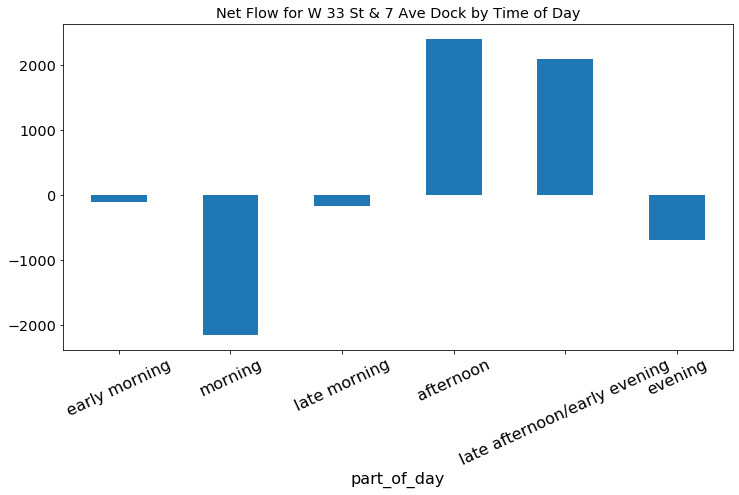

In [336]:
#Net Flow for Example Dock Station by Time of Day

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12,6))
(stoppart-startpart).loc[:, 'W 33 St & 7 Ave'].plot(kind = 'bar', ax=ax, title='Net Flow for W 33 St & 7 Ave Dock by Time of Day')

for tick in ax.get_xticklabels():
    tick.set_rotation(25)

plt.savefig('Example_Flow_2.jpg')

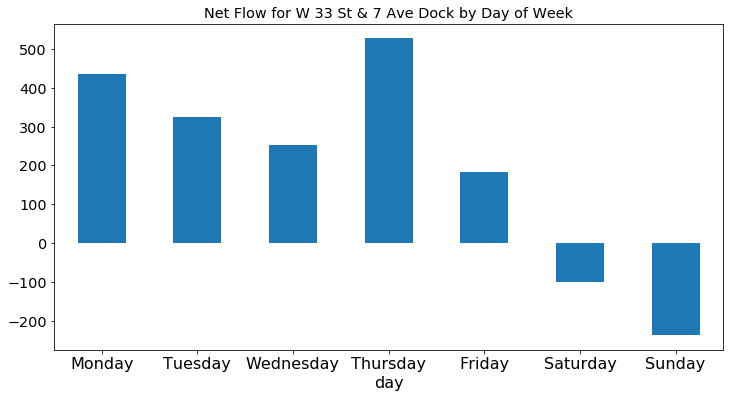

In [332]:
#Net Flow for Example Dock Station by Day of Week

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12,6))
(stopday-startday).loc[:, 'W 33 St & 7 Ave'].plot(kind = 'bar', ax=ax, title='Net Flow for W 33 St & 7 Ave Dock by Day of Week')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.savefig('Example_Flow_1.jpg')

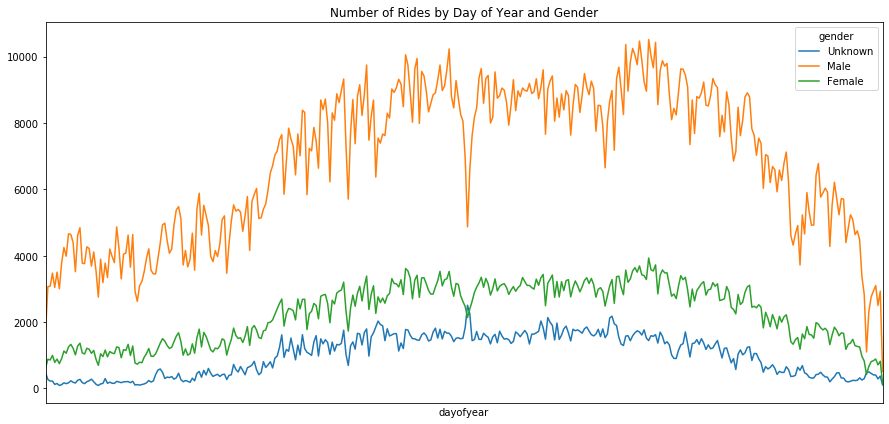

In [110]:
#Number of Rides by Day of Year and Gender

fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['gender', 'dayofyear'])['bikeid'].count().unstack().rename(index={0:"Unknown", 1:"Male", 2:"Female"}).stack().swaplevel(i='gender',j='dayofyear').unstack().plot(ax=ax)
plt.title('Number of Rides by Day of Year and Gender')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

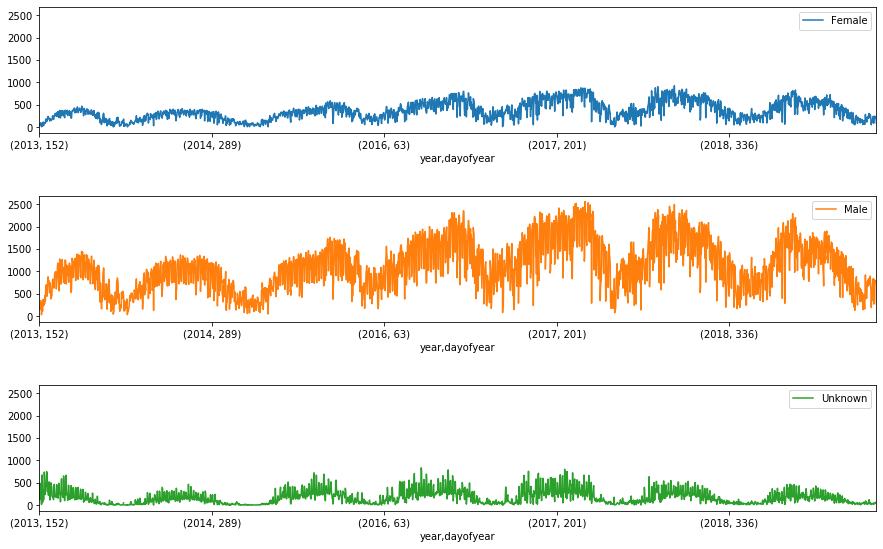

In [470]:
#Number of rides by day of the year and gender

fig, ax = plt.subplots(figsize=(15,7))
cb.groupby(['gender','dayofyear', 'year'])['bikeid'].count().unstack().rename(index={0:"Unknown", 1:"Male", 2:"Female"}).stack().swaplevel(i='gender', j='year').unstack().plot(ax=ax, subplots=True, sharey=True)
plt.subplots_adjust(bottom=0, right=0.9, top=1, hspace = 0.5)

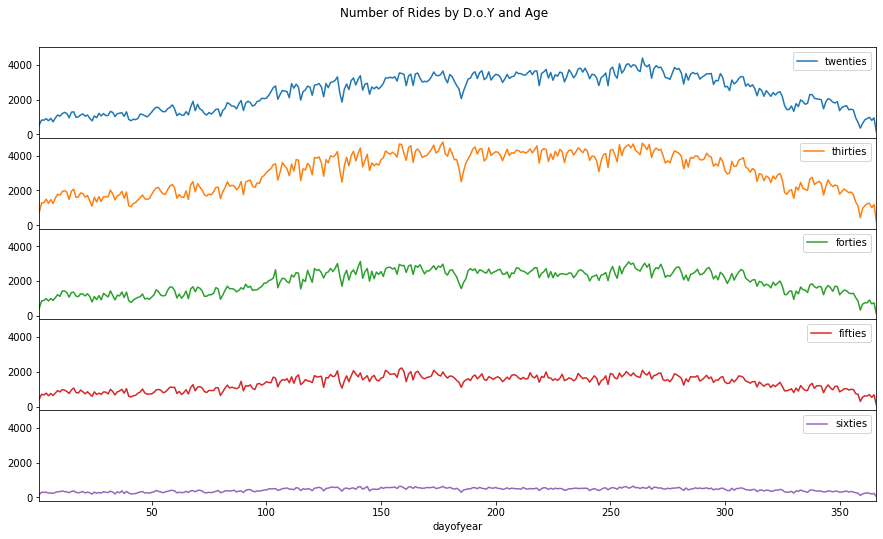

In [131]:
#Number of rides by day of the year and age

fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['dayofyear', 'decade'])['bikeid'].count().unstack().drop('deceased centenials', axis=1).stack().swaplevel(i='decade', j='dayofyear').unstack().reindex(['tens', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']).stack().swaplevel(i='dayofyear', j='decade').unstack().drop(['tens', 'seventies', 'eighties', 'nineties'], axis=1).plot(ax=ax, subplots=True, sharey=True, title='Number of Rides by D.o.Y and Age')
plt.subplots_adjust(bottom=0, right=0.9, top=0.9, hspace = 0)

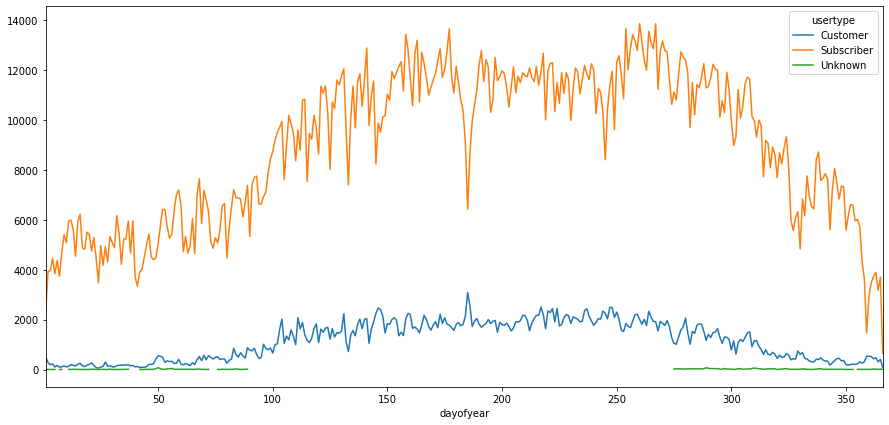

In [125]:
#Number of Rides by day of year by usertype

fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['dayofyear', 'usertype']).count()['bikeid'].unstack().plot(ax=ax)

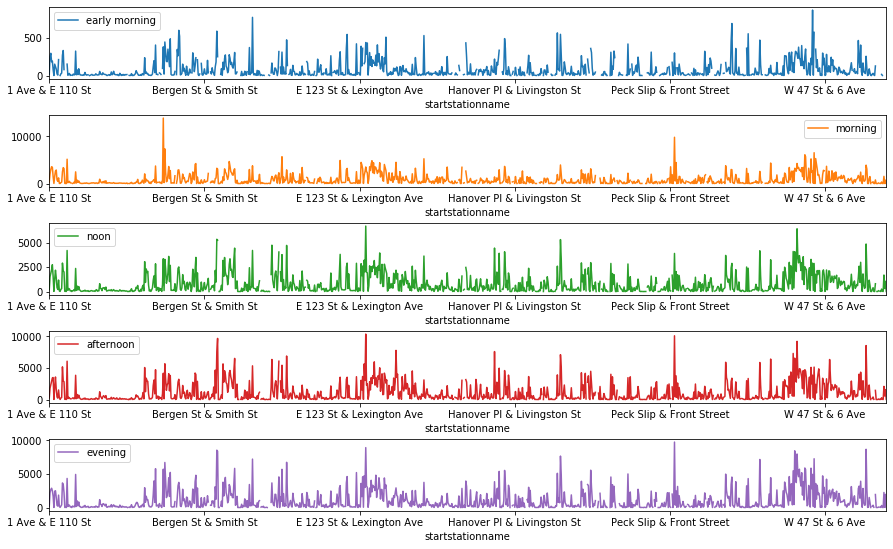

In [424]:
#number of rides by part of day and starting station name

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, figsize=(15,7))

grouped = cb.groupby(['part_of_day', 'startstationname'])['bikeid'].count().unstack().reindex(['early morning', 'morning', 'noon', 'afternoon', 'evening']).stack().swaplevel(i='part_of_day', j='startstationname').groupby('part_of_day')

for name, group in grouped:
    line1 = group.sort_values(ascending=False)[group>50].plot(ax=ax1)
    line2 = group.sort_values(ascending=False)[group<-50].plot(ax=ax2)

plt.subplots_adjust(bottom=0, right=0.9, top=1, hspace = 0.5)

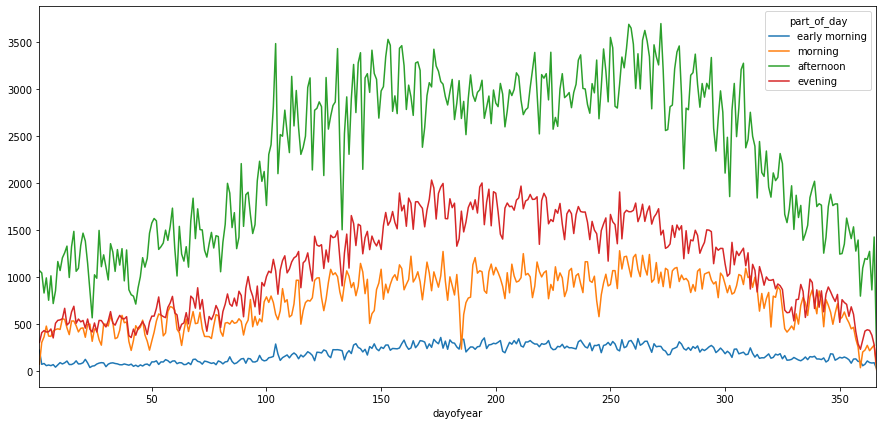

In [126]:
#Ride count by day of year by part of day

fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['part_of_day','dayofyear']).count()['bikeid'].unstack().reindex(['early morning', 'morning', 'noon', 'afternoon', 'evening']).stack().swaplevel(i='part_of_day', j='dayofyear').unstack().plot(ax=ax)

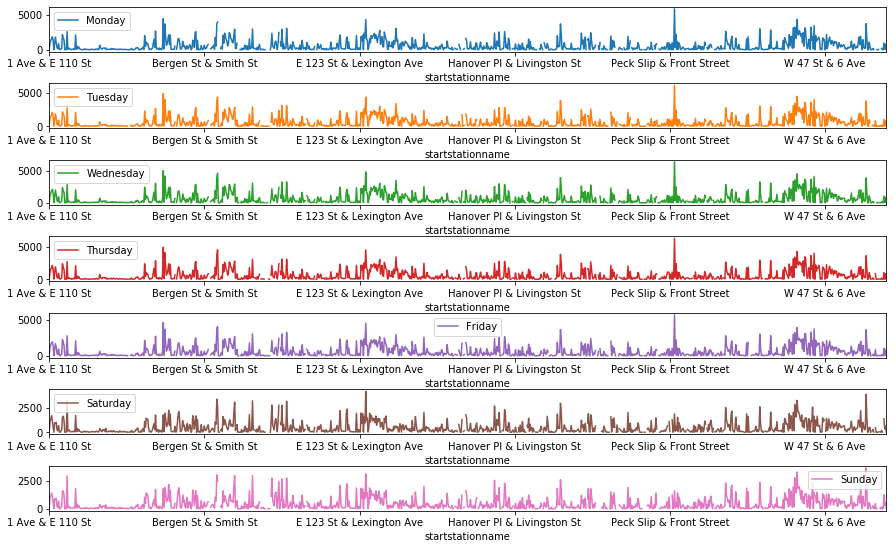

In [330]:
#rides by day by station

fig, ax = plt.subplots(figsize=(15,7))
cb.groupby(['day', 'startstationname'])['bikeid'].count().rename(index={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}).unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).stack().swaplevel(i='day', j='startstationname').unstack().plot(ax=ax, subplots=True)
plt.subplots_adjust(bottom=0, right=0.9, top=1, hspace = 0.7)

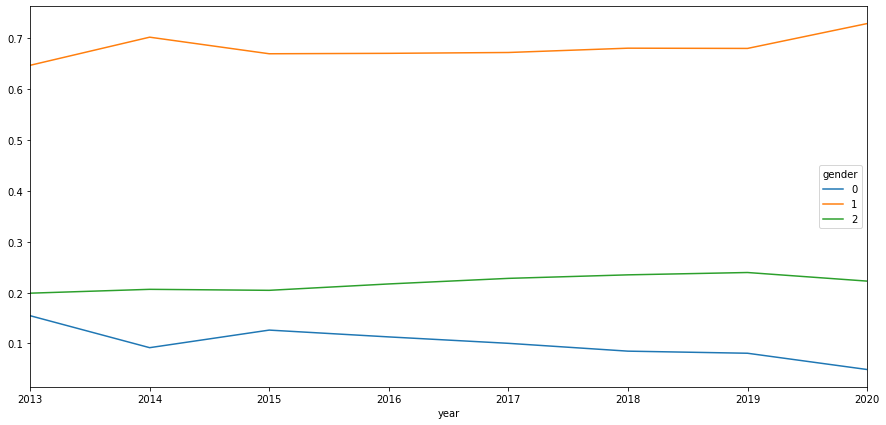

In [135]:
#percentage user by year and gender

fig, ax = plt.subplots(figsize=(15,7))
(cb.groupby(['year', 'gender'])['bikeid'].count()/cb.groupby(['year'])['bikeid'].count()).unstack().plot(ax=ax)

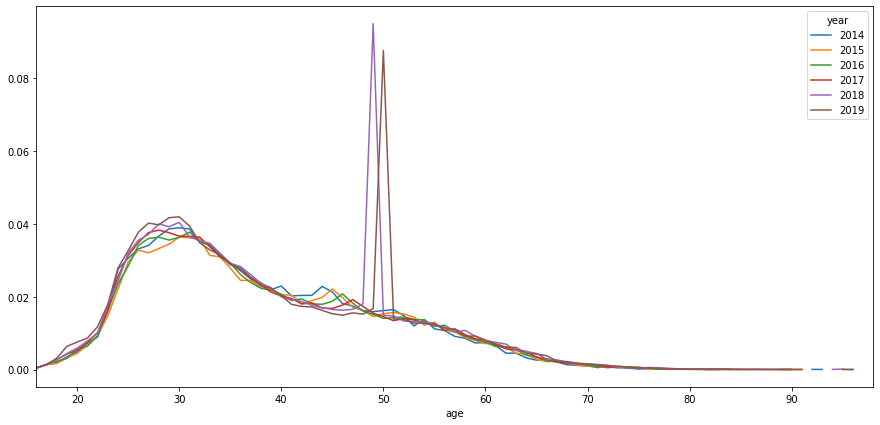

In [20]:
#percent of ridership by age and year

fig, ax = plt.subplots(figsize=(15,7))
(temp.groupby(['age', 'year'])['bikeid'].count()/temp.groupby(['year'])['bikeid'].count()).unstack()[:83].plot(ax=ax)

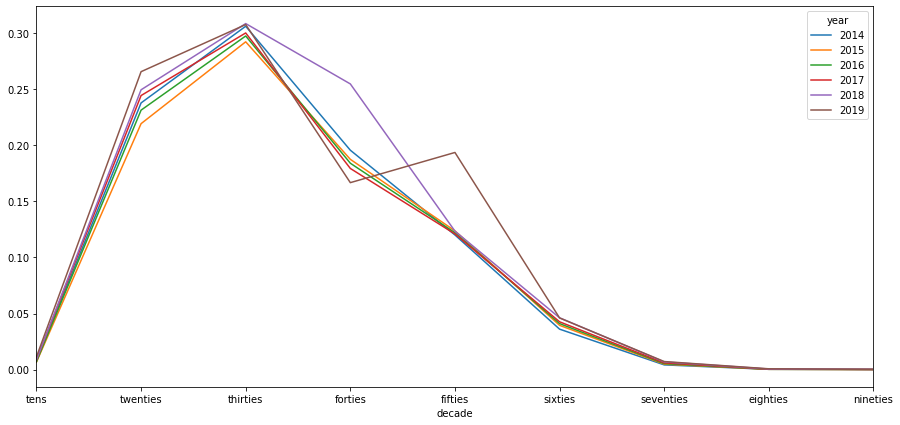

In [19]:
#percent ridership by decadal age of rider and year
#(cb.groupby(['decade', 'year'])['bikeid'].count()/cb.groupby(['year'])['bikeid'].count()).unstack()[1:].reindex(['tens', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties'])

fig, ax = plt.subplots(figsize=(15,7))
(temp.groupby(['decade', 'year'])['bikeid'].count()/temp.groupby(['year'])['bikeid'].count()).unstack()[1:].reindex(['tens', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']).plot(ax=ax)

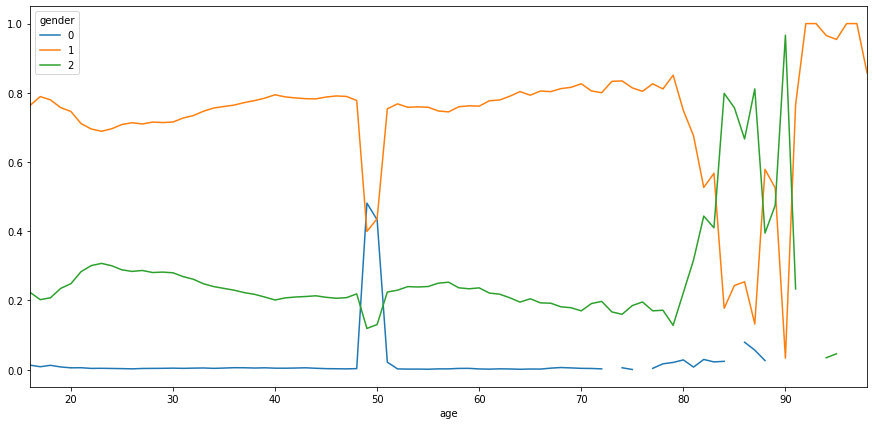

In [140]:
#percent ridership by gender and age

fig, ax = plt.subplots(figsize=(15,7))
(cb.groupby(['age', 'gender'])['bikeid'].count()/cb.groupby(['age'])['bikeid'].count()).unstack()[:83].plot(ax=ax)

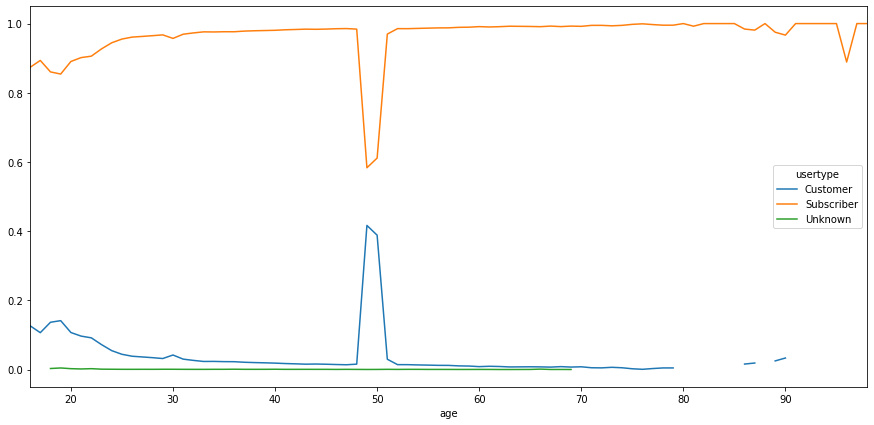

In [243]:
#percent ridership by age by customer type 

fig, ax = plt.subplots(figsize=(15,7))
(cb.groupby(['age', 'usertype'])['bikeid'].count()/cb.groupby(['age'])['bikeid'].count()).unstack()[:83].plot(ax=ax)